In [51]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


In [52]:
path='/Users/qurbamushtaq/Desktop/reddit_finance.xlsx'
data=pd.read_excel(path)
print(data.columns[0])
toBe=['2020_other_exp','2020_debt_repay','Unnamed: 0','political','mortgage','other_val','invst_accts','cash','retirement_accts_tax','brokerage_accts_tax' ]
data.drop(toBe, axis=1, inplace=True)
print(data.columns)

Unnamed: 0
Index(['num_incomes', 'pan_inc_chg', 'pan_inc_chg_pct', 'pan_exp_chg',
       'pan_exp_chg_pct', 'pan_fi_chg', 'pan_ret_date_chg',
       'pan_financial_impact', 'race_eth', 'gender', 'age', 'edu',
       'rel_status', 'children', 'country', 'fin_indy', 'fin_indy_num',
       'fin_indy_pct', 'retire_invst_num', 'tgt_sf_wthdrw_rt',
       'max_retire_sup', 'retire_exp', 'whn_fin_indy_num', 'fin_indy_lvl',
       'retire_age', 'stp_whn_fin_indy', 'industry', 'employer', 'role',
       'ft_status', 'pt_status', 'gig_status', 'ne_status', 'edu_status',
       'housing', 'home_value', 'spec_crypto', 'invst_prop_bus_own',
       'student_loans', 'auto_loan', 'credit_personal_loan', 'medical_debt',
       'invst_prop_bus_own_debt', 'other_debt', '2020_gross_inc',
       '2020_housing_exp', '2020_utilities_exp', '2020_transp_exp',
       '2020_necessities_exp', '2020_lux_exp', '2020_child_exp',
       '2020_invst_save', '2020_charity', '2020_healthcare_exp', '2020_taxes',
       '20

## What questions will be answered in this analysis:
#### 1- How many numbers of people are ususally breadwinner of the house?
#### 2- How pandamic affected the income of the people?
#### 3- How did the expenses changed because of pandamic?
#### 4- How did the number of independent people of house change with pandamic?
#### 5- what is the education background?
#### 6- How many people are financially independent?
#### 7-What is the desired age at which people prefer retirement?
#### 7-Will people stop working for money once they are settled/ are financially indepedent?
#### 9-What is the housing system?
#### 10-Most Selected Retirement Age by Industry'
#### 11- Most popular Employement status according to the industry:


0     1
1     2
2     3
3    >3
Name: options, dtype: object


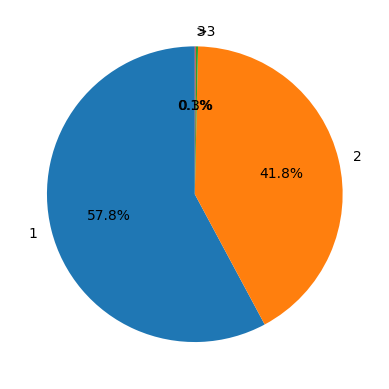

In [91]:
import plotly.express as px

numberOfincome = data['num_incomes'].value_counts().reset_index()
numberOfincome.columns=['options', 'count']
print(numberOfincome['options'])
plt.pie(numberOfincome['count'],labels=numberOfincome['options'], startangle=90, autopct='%1.1f%%')
plt.show()
# fig = px.pie(numberOfincome, values=numberOfincome['num_incomes'], names=numberOfincome['count'], title='Population of European continent')
# fig.show()


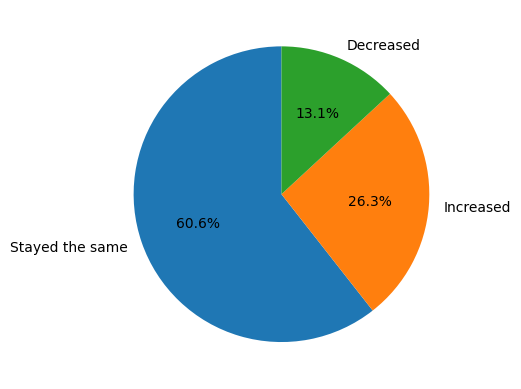

In [100]:
# how pandamic changed the income:
changeIncome=data['pan_inc_chg'].value_counts().reset_index()
changeIncome.columns=['change', 'count']
plt.pie(changeIncome['count'], labels=changeIncome['change'], startangle=90, autopct='%1.1f%%')
plt.show()

Index(['pan_exp_chg', 'count'], dtype='object')
       pan_exp_chg  count
0        Decreased   1328
1  Stayed the same    504
2        Increased    155


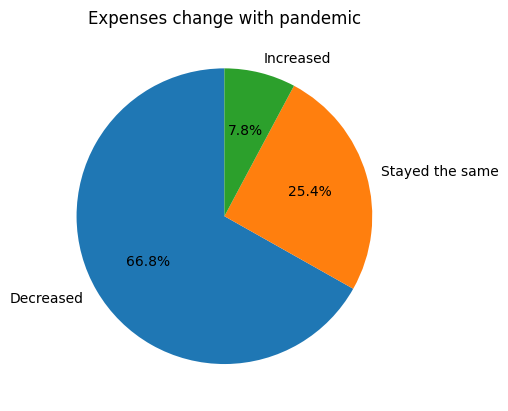

In [111]:
# how did the expenses changed:
expenses=data['pan_exp_chg'].value_counts().reset_index()
print(expenses.columns)
print(expenses)
plt.pie(expenses['count'], labels=expenses['pan_exp_chg'], startangle=90, autopct='%1.1f%%')
plt.title('Expenses change with pandemic')
plt.show()

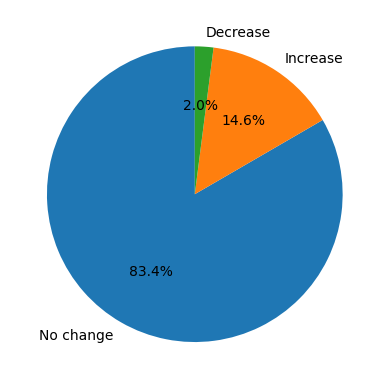

  pan_fi_chg  count
0  No change   1644
1   Increase    288
2   Decrease     40


In [117]:
#change in the number of independent people
financialInd=data['pan_fi_chg'].value_counts().reset_index()
plt.pie(financialInd['count'], labels=financialInd['pan_fi_chg'], startangle=90,autopct='%1.1f%%' )
plt.show()
print(financialInd)

In [126]:
#the country answers:
uniqueCountries=(data['country'].value_counts().nlargest(15).reset_index())
fig=px.bar(data_frame=uniqueCountries, x=uniqueCountries['count'],y=uniqueCountries['country'],orientation='h', color='country')
fig.show(renderer="notebook_connected")
print(uniqueCountries)

           country  count
0    United States   1730
1           Canada     86
2        Australia     33
3   United Kingdom     18
4      Netherlands     18
5          Germany     12
6           Sweden      9
7               Uk      8
8      Switzerland      6
9        Singapore      5
10         Belgium      5
11     New Zealand      5
12          Poland      4
13           Japan      4
14         Romania      3


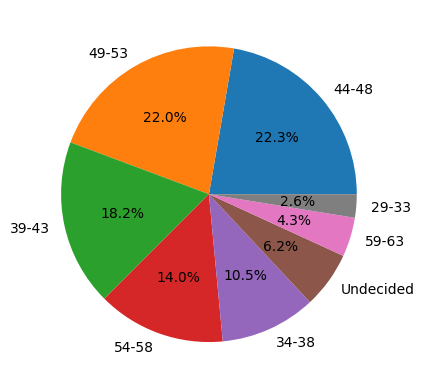

In [132]:
# desire retirement age:
ageRetire=data['retire_age'].value_counts().nlargest(8).reset_index()
plt.pie(ageRetire['count'], labels=ageRetire['retire_age'], autopct='%1.1f%%')
plt.show()

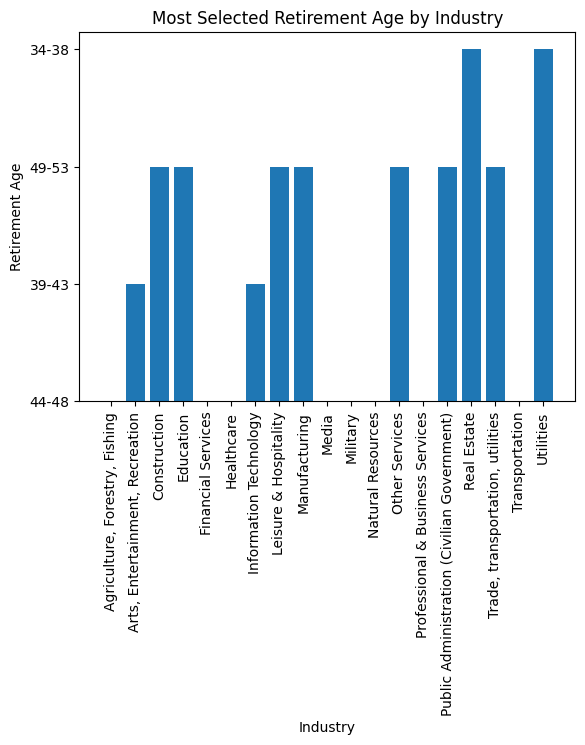

In [324]:
#industry
# Group the data by industry
industry_groups = data.groupby('industry')
# # Initialize empty lists to store industry names and most selected retirement ages
industry_names = []
most_selected_ages = []

# # Iterate over each industry group
for industry, group in industry_groups:
    # Calculate value counts of retire_age column
    age_counts = group['retire_age'].value_counts()
    
#     # Get the most selected retirement age
    most_selected_age = age_counts.idxmax()
    
#     # Append industry name and most selected age to the lists
    industry_names.append(industry)
    most_selected_ages.append(most_selected_age)

# # Create a bar graph
plt.bar(industry_names, most_selected_ages)
plt.xlabel('Industry')
plt.ylabel('Retirement Age')
plt.title('Most Selected Retirement Age by Industry')
plt.xticks(rotation=90)
plt.show()


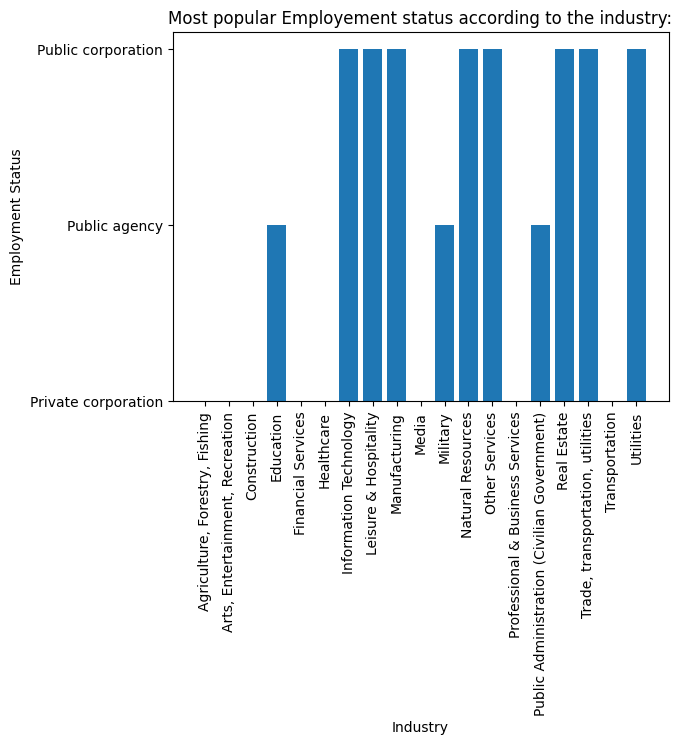

In [327]:
#comparing industry and the employement status:
industry_grouping=data.groupby('industry')
names=[]
employement=[]
for i, j in industry_grouping:
    counters1=j['employer'].value_counts()
    mostPopular=counters1.idxmax()
    names.append(i)
    employement.append(mostPopular)
    
plt.bar(names, employement)
plt.xlabel('Industry')
plt.ylabel('Employment Status')
plt.title('Most popular Employement status according to the industry:')
plt.xticks(rotation=90)

plt.show()

In [335]:
# the education background
education=data['edu'].value_counts().reset_index()
fig=px.bar(data_frame=education, x= education['edu'], y=education['count'], orientation='v', color='edu', title='The count of maximum education"')
fig.show()
fig.write_image('maxedu.png', format='png')
print(education)

                         edu  count
0          Bachelor's Degree   1148
1            Graduate degree    569
2  Doctorate / Post-Graduate    100
3    Some college, no degree     83
4         Associate's Degree     39
5  High School diploma / GED     22
6  Doctorate / Post Graduate     16
7        Trade School Degree     11
8           Some high school      3
9      Less than high school      1


<img src='maxedu.png'>

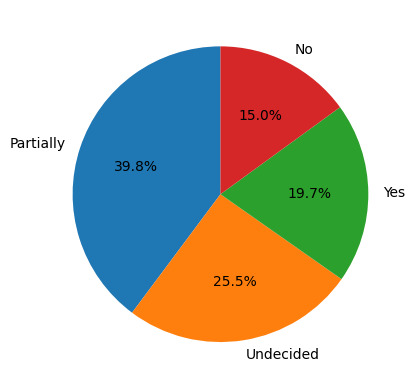

  stp_whn_fin_indy  count
0        Partially    794
1        Undecided    508
2              Yes    394
3               No    299


In [345]:
# poeple will stop for money once they are financially independent
indepe=data['stp_whn_fin_indy'].value_counts().reset_index()
plt.pie(indepe['count'], labels=indepe['stp_whn_fin_indy'], startangle=90, autopct='%1.1f%%')
plt.show()
print(indepe)

In [367]:
#Housing system:
house = data['housing'].value_counts().nlargest(10).reset_index()
# fig = px.bar(data_frame=house, x='count', y='housing', orientation='v', color='housing')
fig=px.bar(data_frame=house, x=house['count'],y=house['housing'],orientation='v', color='housing')
fig.write_image('house.png', format='png')
fig.show()
print(house.columns)


Index(['housing', 'count'], dtype='object')


<img src='house.png'>

1861
